In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import scipy as sp
import warnings
import string
import datetime
warnings.filterwarnings("ignore")
#%matplotlib inlin

In [6]:
data = pd.read_csv('Churn Modeling.csv')  #loads data
data.head() #Shows top 5 entries

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.tail() #shows bottom 5 entries

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
data.describe() #Gives details about every column
                #25,50,75 are percentiles
                #50 is same as median

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.info() #As there is 10000 non null everywhere.... no entry is empty. So, data is complete.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.shape #Shows the shape of data(10000 rows and 14 columns)

(10000, 14)

In [11]:
data.isnull().any() #Again shows all entries are filled
                    #data.isnull() shows where the data is NULL

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [12]:
data.corr() #Shows correlation 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

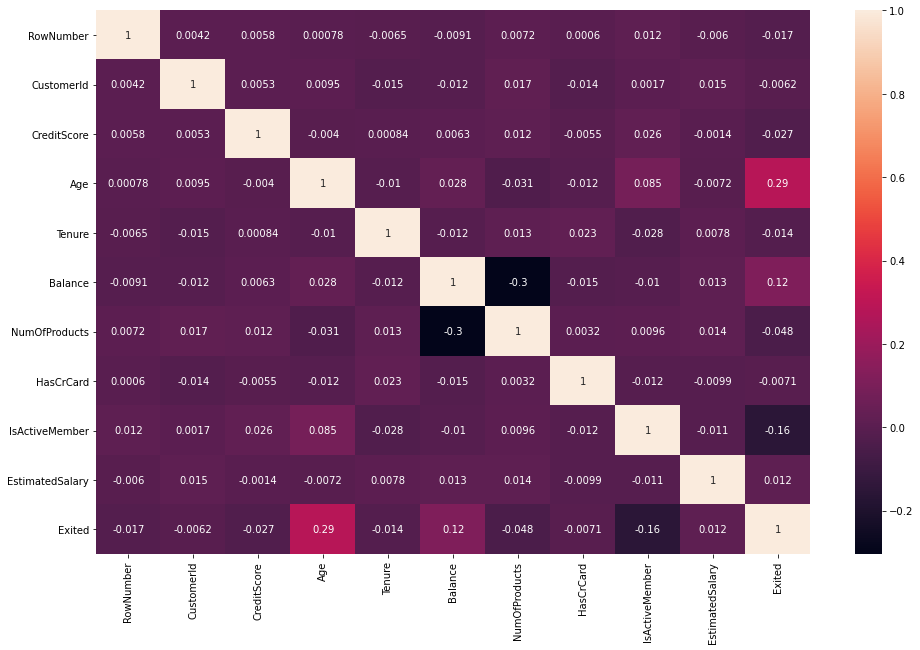

In [13]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot =True) #Plots heat map

#Read Pearson's correlation coefficient
#Greater the correlation, greater the dependance
#Ignore rows with low correlation with "Exited"
#Age has high dependance

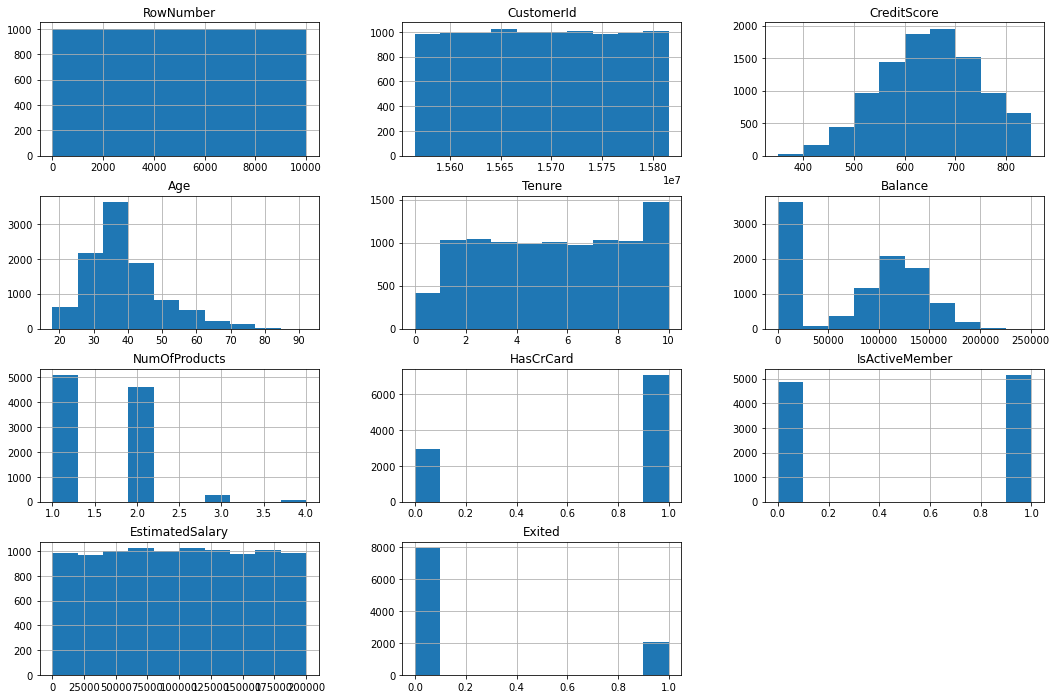

In [14]:
data.hist(figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

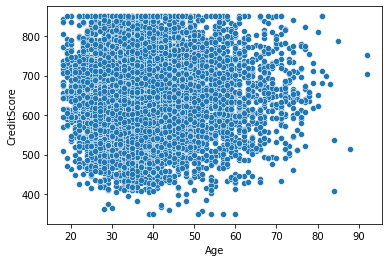

In [15]:
sns.scatterplot(x='Age', y= 'CreditScore', data=data)

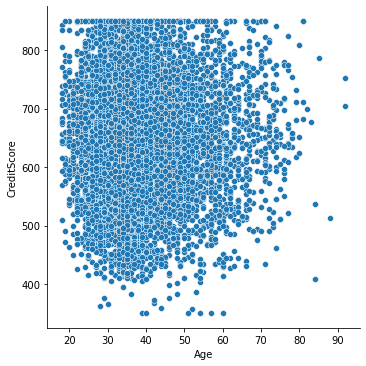

In [16]:
sns.relplot(x='Age', y= 'CreditScore', data=data)

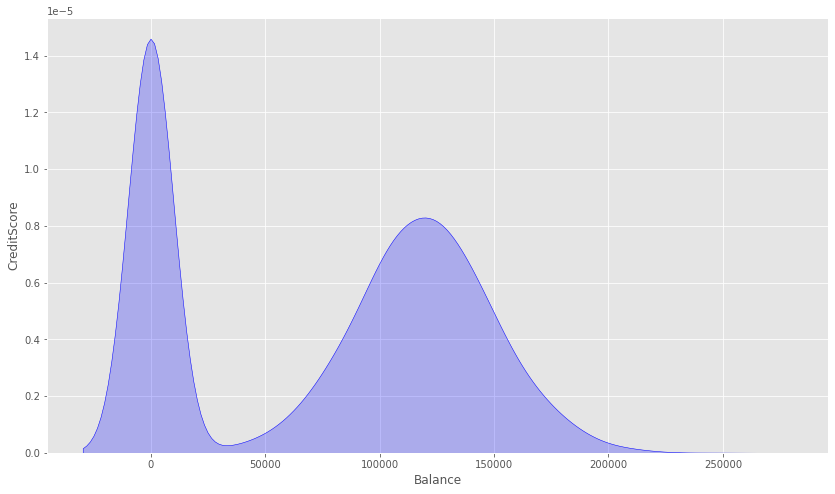

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(14,8))
plt.xlabel('Balance')
plt.ylabel('CreditScore')
sns.kdeplot(data['Balance'],shade=True,color='blue')
plt.show()

In [18]:
#Categorical features can only take on a limited, and usually fixed, number of possible values.
#For example, if a dataset is about information related to users,
#then you will typically find features like country, gender, age group, etc.

#Now, remove categorial features

list_1=list(data.columns)

list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in list_cate:
    data[i]=le.fit_transform(data[i])
    
#Female becomes 0, Male becomes 1
#France becomes 0, Germany becomes 2

In [20]:
data  #New data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [21]:
X = data.drop(columns=['Exited'],axis = 'columns')
y = data['Exited']

In [22]:
#Split test set into training and test data
#3000 in test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)   #Data is shuffeled

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                
X_train = sc.fit_transform(X_train)  #Calculates sigma and mu and does feature scaling
X_test = sc.transform(X_test)  #Uses previous sigma and mu and does feature scaling



In [24]:
import tensorflow as tf
import keras

model = keras.Sequential([
    keras.layers.Dense(32,input_shape = (13,),activation='relu'),
     keras.layers.Dense(16,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

# https://keras.io/guides/sequential_model/
#Kinda like neural networks.
#13 is number of features
#

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
219/219 [==============================] - 11s 1ms/step - loss: 0.6438 - accuracy: 0.6017
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8007
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8305
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8354
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8482
Epoch 6/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8550
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8534
Epoch 8/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8630
Epoch 9/50
219/219 [==============================] - ETA: 0s - loss: 0.3374 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8628
Epoch 10/50
219/219 [==============================] - 0s

In [27]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52
